In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("darkgrid")

In [3]:
os.listdir("../Scikitlearn/Kaggle Comeptition1")

['.ipynb_checkpoints',
 'categorical_cols.parquet',
 'dl-course-data',
 'encoded_cols.parquet',
 'gender_submission.csv',
 'numerical_cols.parquet',
 'Rossman.ipynb',
 'rossmann-store-sales',
 'slopes.png',
 'test.csv',
 'test_data.parquet',
 'test_target.parquet',
 'Titanic-Decision-Tree.ipynb',
 'Titanic-Logistic-regression.ipynb',
 'train (3).csv',
 'training_data.parquet',
 'train_inputs.parquet',
 'train_target.parquet',
 'Untitled.ipynb',
 'Untitled2.ipynb',
 'validation_data.parquet',
 'val_target.parquet',
 'X_test.parquet',
 'X_train.parquet',
 'X_val.parquet']

In [8]:
train = pd.read_csv("../Scikitlearn/Kaggle Comeptition1/train (3).csv")
test = pd.read_csv("../Scikitlearn/Kaggle Comeptition1/test.csv")

### Exploratory Data Analysis

In [10]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
train.describe()
# Mean value (32) and max value is 531 this might indicate a little bit of an outlier in the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
train[["Sex", "Survived"]].groupby("Sex", as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


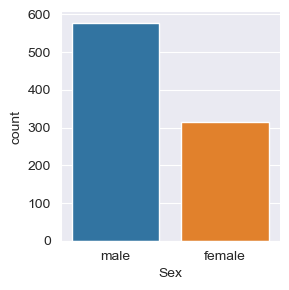

In [17]:
sns.catplot(data=train, x="Sex", kind="count", height=3)

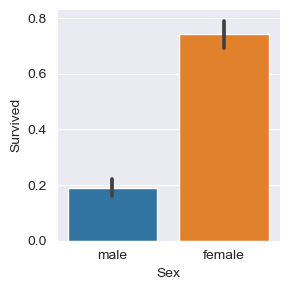

In [18]:
sns.catplot(data=train, x="Sex", y="Survived", kind="bar", height=3)

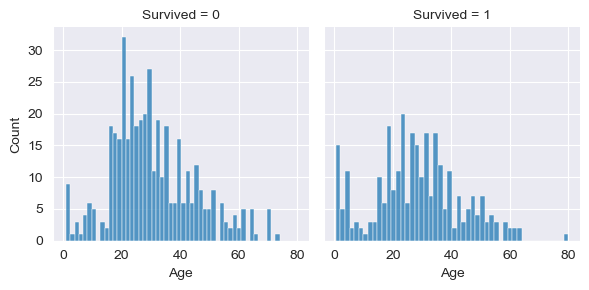

In [29]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Age", bins=50)

<Axes: xlabel='PassengerId', ylabel='Age'>

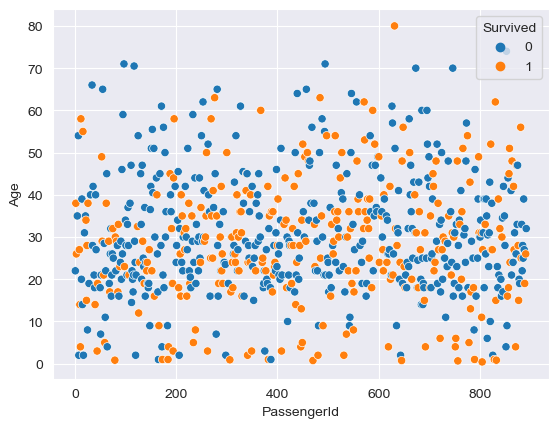

In [36]:
sns.scatterplot(train, x="PassengerId", y="Age", hue="Survived")

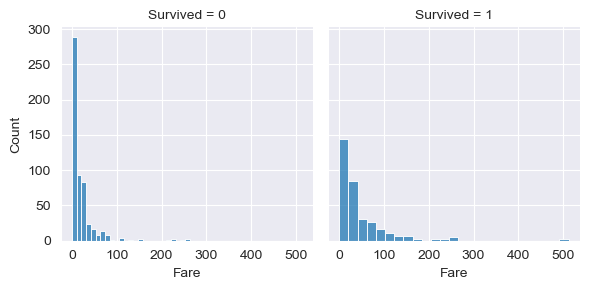

In [38]:
sns.FacetGrid(train, col="Survived").map(sns.histplot, "Fare", bins=25)

In [39]:
train[["Fare"]]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


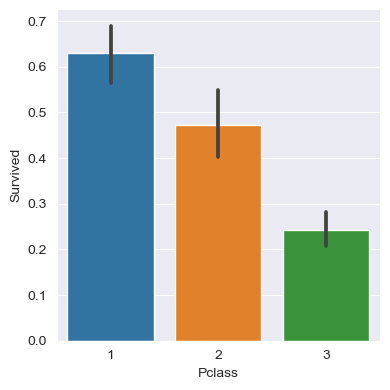

In [41]:
sns.catplot(x="Pclass", y="Survived", data=train, kind="bar", height=4)

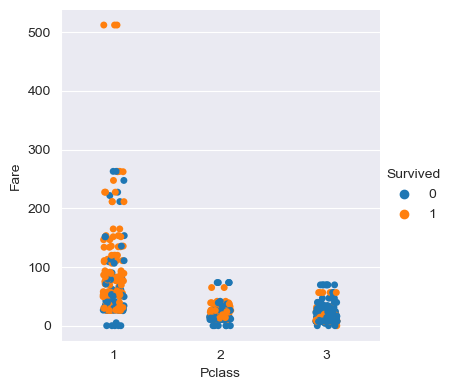

In [51]:
sns.catplot(x="Pclass", kind="strip", hue="Survived", y="Fare",  data=train, height=4)

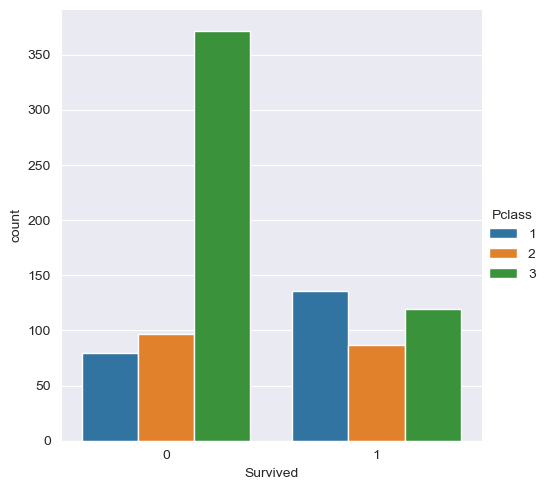

In [58]:
sns.catplot(data=train, hue="Pclass", kind="count", x="Survived")

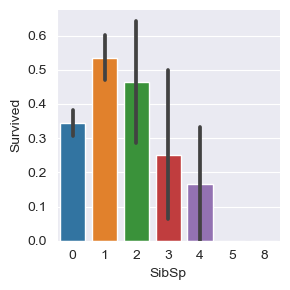

In [59]:
sns.catplot(x="SibSp", y='Survived', data=train, kind="bar", height=3)

In [67]:
train[["Parch", "Survived"]].groupby("Parch", as_index=False).agg(["mean", "count", "sum"])

Survived           
           mean count  sum
Parch                     
0      0.343658   678  233
1      0.550847   118   65
2      0.500000    80   40
3      0.600000     5    3
4      0.000000     4    0
5      0.200000     5    1
6      0.000000     1    0

In [73]:
train[["Embarked", "Survived"]].groupby("Embarked", as_index=False).agg(["mean", "count", "sum"])

Survived           
              mean count  sum
Embarked                     
C         0.553571   168   93
Q         0.389610    77   30
S         0.336957   644  217

In [100]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.highlight_between()

In [102]:
pd.crosstab([train.Embarked, train.Survived], train.Pclass, margins=True)

Pclass               1    2    3  All
Embarked Survived                    
C        0          26    8   41   75
         1          59    9   25   93
Q        0           1    1   45   47
         1           1    2   27   30
S        0          53   88  286  427
         1          74   76   67  217
All                214  184  491  889

### Feature Engineering

In [103]:
genders = {"male": 0, "female": 1}
data = [train, test]
for dataset in data:
    dataset["Sex"] = dataset["Sex"].map(genders)

In [105]:
dataset["Sex"].unique()

array([0, 1], dtype=int64)

In [108]:
embark = {"Q": 0, "S": 1, "C": 2}
for dataset in data:
    dataset["Embarked"] = dataset["Embarked"].map(embark)

In [109]:
test.Embarked.unique()

array([0, 1, 2], dtype=int64)

In [115]:
for dataset in data:
    dataset["Fare"] = dataset["Fare"].fillna(0)
    dataset["Fare"] = dataset["Fare"].astype(int)

In [119]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [443]:
data_train_test = pd.concat([train.assign(ind="Train"), test.assign(ind="Test")], ignore_index=True)

In [444]:
data_train_test.shape

(1309, 14)

In [445]:
age_nan_post = data_train_test[data_train_test["Age"].isna()].index
age_nan_post

Int64Index([   5,   17,   19,   26,   28,   29,   31,   32,   36,   42,
            ...
            1256, 1257, 1271, 1273, 1275, 1299, 1301, 1304, 1307, 1308],
           dtype='int64', length=263)

In [439]:
def convert_status(dataset):
    dataset["Titles"] = dataset["Name"].str.extract("([a-zA-Z]+)\.")
    dataset["Titles"] = dataset["Titles"].replace(['Rev', 'Mlle', 'Major', 'Col', 'Countess', 'Capt', 'Ms', 'Sir', 'Lady',
       'Mme', 'Don',"Dona", 'Jonkheer'], "Others")

data = [train, test]
for dataset in data:
    convert_status(dataset)

In [476]:
arr = []
def fill_age(dataset):
    for i in age_nan_post:
        mean_age = data_train_test["Age"][data_train_test["Titles"]==data_train_test.iloc[i]["Titles"]].mean()
        data_train_test["Age"].iloc[i] = mean_age
fill_age(train)
len(arr)

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_13212\1320649087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_test["Age"].iloc[i] = mean_age


0

In [456]:
data_train_test["Age"][data_train_test["Titles"]=="Mr"].mean()

32.25215146299484

In [474]:
pd.DataFrame(arr)[0].nunique()

6

In [475]:
dataset["Titles"].nunique()

6